# **Aluno: Alan Diek Guimarães**

# **Introdução à Linguagem MDX**



O MDX (Multidimensional Expressions) é uma linguagem de consulta utilizada para recuperar e manipular dados em bancos de dados multidimensionais. Ele é amplamente usado em sistemas de Business Intelligence (BI), especialmente para acessar dados armazenados em cubos OLAP (Online Analytical Processing).

# 1. O Que é MDX?
O MDX foi desenvolvido pela Microsoft e é usado principalmente no SQL Server Analysis Services (SSAS). Sua estrutura lembra o SQL, mas é otimizada para consultas complexas em dados multidimensionais.

Os bancos de dados multidimensionais organizam dados em um formato chamado cubo OLAP, onde as informações são distribuídas em diferentes dimensões.

Por exemplo, um cubo OLAP para análise de vendas pode ter as seguintes dimensões:

* Tempo (anos, meses, dias)

* Produto (categorias, marcas)

* Região (país, estado, cidade)

* Isso permite análises avançadas, como:

* Comparar vendas de um produto em diferentes regiões.

* Calcular tendências ao longo do tempo.

* Aplicar agregações e cálculos personalizados.

# 2. Diferença entre MDX e SQL

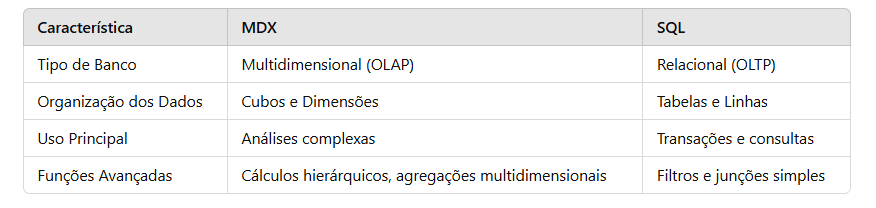

# 3. Estrutura de uma Consulta MDX
Uma consulta MDX básica tem a seguinte estrutura:

```
SELECT
  [Measures].[Vendas Totais] ON COLUMNS,
  [Dimensão Tempo].[Ano].[2023] ON ROWS
FROM [CuboVendas]
WHERE ([Dimensão Produto].[Categoria].[Eletrônicos])
```


Explicação:
SELECT: Define os dados a serem retornados.

ON COLUMNS: Define os valores que aparecerão nas colunas (nesse caso, a métrica "Vendas Totais").

ON ROWS: Define os valores das linhas (aqui, os anos da dimensão Tempo).

FROM: Define o cubo de onde os dados serão extraídos.

WHERE: Filtra os resultados para uma categoria específica ("Eletrônicos").

# 4. Aplicações do MDX
MDX é usado em diversos cenários dentro do Business Intelligence e Data Analytics:
* Relatórios gerenciais – Extração de dados para dashboards em ferramentas como Power BI.
* Análises preditivas – Modelagem de tendências de mercado.
* Monitoramento de KPIs – Avaliação de desempenho empresarial.

# 5. Exemplo Prático
Se uma empresa quer saber as vendas totais por região em 2023, pode usar a seguinte consulta MDX:

```
SELECT [Measures].[Vendas Totais] ON COLUMNS,
[Dimensão Região].[Estado].Members ON ROWS
FROM [CuboVendas]
WHERE ([Dimensão Tempo].[Ano].[2023])
```

Isso retornaria algo assim:

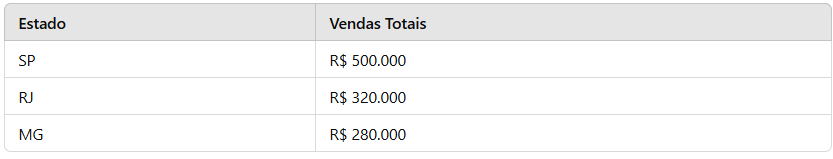

# EXEMPLO UTILIZANDO SQL E MDX
* No modelo OLAP os dados são organizados em:
* Fatos (Valores Numericos) e Dimensões (Categorias para analise)

# Exemplo usando SQL

```
# Criando o Banco de dados

CREATE DATABASE Pizzaria;
USE Pizzaria;


# Tabela de Dimensão: Sabores de Pizza
CREATE TABLE Dim_Sabor (
    SaborID INT PRIMARY KEY AUTO_INCREMENT,
    Nome VARCHAR(50) NOT NULL
);


```

```
# Tabela de Dimensão
CREATE TABLE Dim_Tempo (
    DataID INT PRIMARY KEY AUTO_INCREMENT,
    Data DATE UNIQUE NOT NULL,
    Ano INT NOT NULL,
    Mes INT NOT NULL,
    Trimestre INT NOT NULL
);

# Tabela de Dimensão
CREATE TABLE Dim_Tempo (
    DataID INT PRIMARY KEY AUTO_INCREMENT,
    Data DATE UNIQUE NOT NULL,
    Ano INT NOT NULL,
    Mes INT NOT NULL,
    Trimestre INT NOT NULL
);

```

```
# Inserindo valores na tabela Sabor
INSERT INTO Dim_Sabor (Nome) VALUES
('Mussarela'), ('Calabresa'), ('Portuguesa'), ('Frango com Catupiry'), ('Quatro Queijos'), ('Marguerita');
```

```
# Inserindo dados
INSERT INTO Dim_Tempo (Data, Ano, Mes, Trimestre) VALUES
('2024-03-01', 2024, 3, 1),
('2024-03-02', 2024, 3, 1),
('2024-03-03', 2024, 3, 1),
('2024-03-04', 2024, 3, 1),
('2024-03-05', 2024, 3, 1),
('2024-03-06', 2024, 3, 1);

INSERT INTO Fato_Vendas (SaborID, DataID, Receita, Custo, Quantidade_Vendida) VALUES
(1, 1, 1500, 800, 50),
(2, 2, 2000, 1100, 70),
(3, 3, 1700, 900, 60),
(4, 4, 2200, 1300, 75),
(5, 5, 1800, 1000, 65),
(6, 6, 2500, 1400, 85);
```


```
# Consulta: Receita e Quantidade Vendida por Sabor
SELECT s.Nome AS Sabor, v.Receita, v.Quantidade_Vendida
FROM Fato_Vendas v
JOIN Dim_Sabor s ON v.SaborID = s.SaborID;

#  Consulta: Lucro Líquido por Sabor
SELECT s.Nome AS Sabor,
       v.Receita,
       v.Custo,
       (v.Receita - v.Custo) AS Lucro_Liquido
FROM Fato_Vendas v
JOIN Dim_Sabor s ON v.SaborID = s.SaborID
ORDER BY Lucro_Liquido DESC;
```

# Exemplo usando MDX

* Lista todos os sabores de pizza (Dim_Sabor.Nome), exibindo as medidas Receita e Quantidade_Vendida.

```
SELECT
    [Dim_Sabor].[Nome].MEMBERS ON ROWS,
    { [Measures].[Receita], [Measures].[Quantidade_Vendida] } ON COLUMNS
FROM [Cubo_Vendas]
```


*  Define uma medida calculada [Lucro_Liquido] que subtrai Custo de Receita, retornando o lucro líquido por sabor.

```
WITH MEMBER [Measures].[Lucro_Liquido] AS
    ([Measures].[Receita] - [Measures].[Custo])
SELECT
    [Dim_Sabor].[Nome].MEMBERS ON ROWS,
    [Measures].[Lucro_Liquido] ON COLUMNS
FROM [Cubo_Vendas]
```


* Ordena os sabores de pizza pelo lucro líquido, do maior para o menor.

```
WITH MEMBER [Measures].[Lucro_Liquido] AS
    ([Measures].[Receita] - [Measures].[Custo])
SELECT
    ORDER([Dim_Sabor].[Nome].MEMBERS, [Measures].[Lucro_Liquido], DESC) ON ROWS,
    [Measures].[Lucro_Liquido] ON COLUMNS
FROM [Cubo_Vendas]
```

* Retorna a receita total por mês, utilizando a dimensão Dim_Tempo.

```
SELECT
    [Dim_Tempo].[Mes].MEMBERS ON ROWS,
    [Measures].[Receita] ON COLUMNS
FROM [Cubo_Vendas
```

* Filtra os dados para exibir apenas as vendas do primeiro trimestre de 2024.

```
SELECT
    [Dim_Sabor].[Nome].MEMBERS ON ROWS,
    { [Measures].[Receita], [Measures].[Quantidade_Vendida] } ON COLUMNS
FROM [Cubo_Vendas]
WHERE ([Dim_Tempo].[Ano].[2024], [Dim_Tempo].[Trimestre].[1])
```

# Modelo python do script Pizzaria

```
import pandas as pd

# Criar um exemplo de cubo OLAP para uma pizzaria
dados = {
    'Sabor': ['Calabresa', 'Mussarela', 'Portuguesa', 'Frango c/ Catupiry', 'Quatro Queijos', 'Pepperoni'],
    'Receita': [15000, 12000, 10000, 8000, 9000, 14000],
    'Custo': [7000, 5000, 4500, 4000, 4200, 6000],
    'Pedidos_Realizados': [300, 250, 200, 180, 190, 270]
}
df = pd.DataFrame(dados)

# Simular a recuperação de dados (equivalente a um SELECT MDX)
def recuperar_dados(df):
    return df[['Sabor', 'Receita', 'Pedidos_Realizados']]

df_recuperacao = recuperar_dados(df)
display(df_recuperacao)

# Simular um cálculo personalizado (Margem de Lucro)
def calcular_margem(df):
    df['Margem_Lucro'] = (df['Receita'] - df['Custo']) / df['Receita']
    return df[['Sabor', 'Receita', 'Custo', 'Margem_Lucro']]

df_calculo = calcular_margem(df)
display(df_calculo)

# Criar um cálculo adicional - Ticket Médio
def calcular_ticket_medio(df):
    df['Ticket_Medio'] = df['Receita'] / df['Pedidos_Realizados']
    return df[['Sabor', 'Receita', 'Pedidos_Realizados', 'Ticket_Medio']]

df_ticket_medio = calcular_ticket_medio(df)
display(df_ticket_medio)

# Criar uma análise comparativa entre sabores de pizza
def analisar_sabores(df):
    df['Lucro_Liquido'] = df['Receita'] - df['Custo']
    df_sorted = df.sort_values(by='Lucro_Liquido', ascending=False)
    return df_sorted[['Sabor', 'Receita', 'Custo', 'Lucro_Liquido']]

df_analise = analisar_sabores(df)
display(df_analise)

```


#6 Conclusão
MDX é uma ferramenta poderosa para análise multidimensional, sendo amplamente utilizada em BI e Data Science. Se você trabalha com grandes volumes de dados estruturados em cubos OLAP, aprender MDX pode melhorar sua capacidade de análise e tomada de decisão.